In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ConditionalDynamic import *
from MultiConditionalDynamic import *

In [2]:
def d1(t, x):
    A = np.array([[0, 1], [-1, -0.1]])
    return np.matmul(A, x) + np.array([0, -10])


def e1(t, x):
    return x[0]


def t1(t, x):
    return x


def d2(t, x):
    return np.array([x[1], -10])


def e2(t, x):
    return -x[0]


def t2(t, x):
    return x

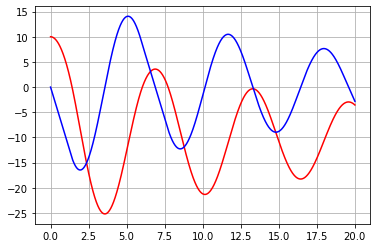

In [3]:
dyn1 = ConditionalDynamic(d1, e1, t1)
dyn2 = ConditionalDynamic(d2, e2, t2, dyn1)
dyn1.nxt = dyn2

x0 = np.array([10, 0])
t_span = [0, 20]
r = dyn2.run(x0, t_span)

plt.plot(r[0], r[1][0, :], "r-")
plt.plot(r[0], r[1][1, :], "b-")
plt.grid()
plt.show()

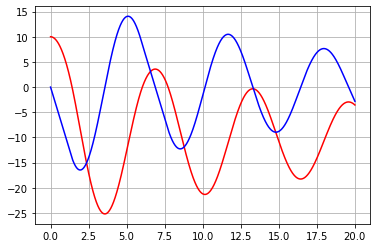

In [4]:
dyn1 = MultiConditionalDynamic(d1, [e1], [t1])
dyn2 = MultiConditionalDynamic(d2, [e2], [t2], [dyn1])
dyn1.nxts = [dyn2]

x0 = np.array([10, 0])
t_span = [0, 20]
r = dyn2.run(x0, t_span)

plt.plot(r[0], r[1][0, :], "r-")
plt.plot(r[0], r[1][1, :], "b-")
plt.grid()
plt.show()

In [5]:
def d1(t, x):
    return np.array([x[1], 0])

def e11(t, x):
    return -x[0]

def e12(t, x):
    return x[0]-1

def t11(t, x):
    return x

def t12(t, x):
    return np.array([x[0], -x[1]])

def d2(t, x):
    return np.array([x[1], -x[0]])

def e2(t, x):
    return x[0]

def t2(t, x):
    return x

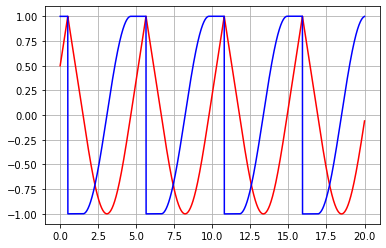

In [6]:
mcdynamic1 = MultiConditionalDynamic(d1, [e11, e12], [t11, t12])
mcdynamic2 = MultiConditionalDynamic(d2, [e2], [t2])
mcdynamic1.nxts = [mcdynamic2, mcdynamic1]
mcdynamic2.nxts = [mcdynamic1]

x0 = np.array([0.5, 1])
t_span = [0, 20]
r = mcdynamic1.run(x0, t_span)

plt.plot(r[0], r[1][0, :], "r-")
plt.plot(r[0], r[1][1, :], "b-")
plt.grid()
plt.show()